In [29]:
import pandas as pd
from datetime import datetime
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [232]:
df1 = pd.read_excel('./books_list/Ganpyeong.xlsx')
df2 = pd.read_excel('./books_list/Guam.xlsx')
df3 = pd.read_excel('./books_list/Guzeuk.xlsx')
df4 = pd.read_excel('./books_list/Jinjam.xlsx')
df5 = pd.read_excel('./books_list/Noen.xlsx')
df6 = pd.read_excel('./books_list/Onesinheung.xlsx')
df7 = pd.read_excel('./books_list/y-star_expo.xlsx')
df8 = pd.read_excel('./books_list/y-star.xlsx')

/home/najo/miniconda3/envs/nlp/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/najo/miniconda3/envs/nlp/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/najo/miniconda3/envs/nlp/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/najo/miniconda3/envs/nlp/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/najo/miniconda3/envs/nlp/lib/python3.8

In [233]:
df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df_concat.to_pickle('df_books_data_lists.pickle')
df_books_data_lists = pd.read_pickle('./df_books_data_lists.pickle')

In [234]:
avg_ratings = df_books_data_lists.groupby('도서명')['대출건수'].sum().reset_index().rename(columns={'대출건수': 'avg_rating'})
avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)


In [235]:
cnt_ratings = df_books_data_lists.groupby('도서명')['도서권수'].sum().reset_index().rename(columns={'도서권수': 'count_rating'})
cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

In [236]:
#특정 컬럼 지정하여 제거하기 #inplace 지정시 바로 변경 #axis 1, 열제거
df_books_data_lists.drop(["도서권수", "대출건수"], axis=1, inplace=True)

In [237]:
cnt

,도서명,count_rating
282325,이상한 나라의 앨리스,103
190187,보물섬,90
263045,오즈의 마법사,83
337118,플랜더스의 개,81
247938,어린 왕자,81
...,...,...
214524,세계사를 바꾼 7가지 결정적 생각들,1
82209,on the banks of plum creek. 4,1
82207,n분의 1의 함정 :합리적이고 전략적인 게임이론의 모든 것,1
82206,new 알기쉬운 Java2,1


In [238]:
avg

,도서명,avg_rating
247938,어린 왕자,2638
263045,오즈의 마법사,2422
325783,키다리 아저씨,2387
282325,이상한 나라의 앨리스,2269
159810,로빈슨 크루소,2143
...,...,...
142307,달마야 서울 가자,0
142303,달마농구 2 : NBA농구 기술 100선. 2,0
142302,달마농구 1 : NBA농구 기술 100선. 1,0
142300,달마 고양이,0


In [239]:
df_books_data_lists = pd.merge(left=df_books_data_lists, right=avg, how='left', on= '도서명')
df_books_data_lists = pd.merge(left=df_books_data_lists, right=cnt, how='left', on= '도서명')

In [240]:
#컬럼명 변경
df_books_data_lists.rename(columns={'count_rating':'도서권수', 'avg_rating':'대출건수'}, inplace=True)

In [241]:
#중복 제거
df_books_data_lists=df_books_data_lists.drop_duplicates(['도서명'], keep = 'first')

In [242]:
df_books_data_lists

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자,대출건수,도서권수
0,1,수학 탐정스 . 5 할아버지의 진짜 유산은?,조인하,미래엔,2023,9791162335895,NaN,NaN,5.0,410,2023-07-27,0.0,1.0
1,2,조선연애실록 : 로즈빈 장편소설 . 3,로즈빈,팩토리나인,2023,9791165347550,NaN,NaN,3.0,813.7,2023-07-27,0.0,1.0
2,3,숲의 언어 : 자연의 속삭임에 귀 기울이면,남영화,남해의봄날,2023,9791193027059,NaN,NaN,NaN,818,2023-07-27,0.0,1.0
3,4,하와이에서 보물찾기,포도알친구,미래엔,2022,9788937891786,NaN,NaN,26.0,980.24,2023-07-27,0.0,1.0
4,5,요즘 팀장의 오답 노트 : 팀 성과를 좌우하는 여럿이 일 잘하는 법,서현직,웅진지식하우스,2023,9788901273037,NaN,NaN,NaN,325.24,2023-07-27,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624938,130577,동물은 내친구,송윤미 사진,현실과 미래사,2000,9788988017265,NaN,NaN,4,375.108,1970-01-01,0.0,2.0
624940,130579,홍루몽. 3,조설근 지음 ; 조성기 편작,민음사,1997,9788937402395,NaN,NaN,3,823.6,1970-01-01,0.0,1.0
624941,130580,내 마음대로 된다면,조은수 지음 ; 이진아 그림,웅진출판,1997,9788901023243,NaN,NaN,9,375.108,1970-01-01,0.0,2.0
624942,130581,누가 창문을 두드리지?,엄혜숙 지음 ; 변정연 그림,웅진출판,1997,9788901023236,NaN,NaN,8,375.108,1970-01-01,0.0,2.0


In [243]:
df_books_data_lists.to_pickle('df_books_data_lists.pkl')

In [349]:
df_books_data_lists = pd.read_pickle('df_books_data_lists.pkl')
df = pd.read_pickle('./library_data/all_book_list_counted.pickle')

In [350]:
#컬럼명 변경
df.rename(columns={'bookname':'도서명'}, inplace=True)

In [409]:
df['성별'=='남'].value_counts()

KeyError: False

In [406]:
df['연령'].value_counts()

40    410854
10    229402
0     189696
30    144976
50     85895
60     38254
20     31024
70     16319
80      2852
90       334
Name: 연령, dtype: int64

In [351]:
df_ISBN = pd.merge(left=df, right=df_books_data_lists, how='left', on= '도서명')

In [352]:
df_ISBN

,이용자ID,등록번호,도서명,대출유형,대출일,소장처,자료실,청구기호,대출도서관,반납도서관,...,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자,대출건수,도서권수
0,13000019083742,ANM000087259,(피터 린치의) 이기는 투자,일반대출,20220102,노은도서관,종합자료실,327.8 린974ㅇ,노은도서관,노은도서관,...,흐름출판,2008,9788990872449,NaN,NaN,2,327.856,2008-08-20,335.0,9.0
1,13000017050092,BEM000257730,"문방구 TV . 7 , 랭킹 대탐구",일반대출,20220102,유성도서관,어린이실,813.8 문589ㅁ v.7,유성도서관,유성도서관,...,서울문화사,2020,9791164383436,9791164381845.0,NaN,7,813.8,2021-06-18,62.0,1.0
2,13000021042233,BEM000227523,"나, 이사 갈 거야",일반대출,20220102,유성도서관,어린이실,808.3 동916ㄴ v.8 c.2,유성도서관,유성도서관,...,논장,2019,9788984143548,NaN,NaN,8.0,808.91,2021-03-31,107.0,7.0
3,13000011005389,GWM000001239,Z 캠프 : 김영주 장편소설,일반대출,20220102,원신흥도서관,종합자료실,813.7 김683ㅈ,원신흥도서관,원신흥도서관,...,사계절출판사,2017,9788958284734,NaN,NaN,NaN,813.7,2018-12-24,21.0,1.0
4,13000015079511,ANM000075893,"(제로니모의)환상모험 . 16 , 마르코 폴로의 위대한 모험",일반대출,20220102,노은도서관,어린이실,883 스233ㅎ v.16 c.3,노은도서관,노은도서관,...,이퍼블릭,2013,9788964808757,9788962245332.0,NaN,16,883,2018-12-12,82.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149601,13000022150993,GWM000043494,(학교에서 가르쳐 주지 않는) 못말리는 짱구의 신비한 정리정돈,일반대출,20221231,원신흥도서관,어린이자료실,199 우159ㅁ,원신흥도서관,원신흥도서관,...,학산문화사(단행본),2022,9791134887322,NaN,NaN,NaN,199.0,2022-04-13,38.0,1.0
1149602,13000012041642,GWM000038934,마녀를 잡아라,일반대출,20221231,원신흥도서관,어린이자료실,843 달315ㅁ,원신흥도서관,원신흥도서관,...,시공사,2012,9788952724366,NaN,NaN,35,808.9,2013-09-27,554.0,9.0
1149603,13000012041642,GWM000012700,시끄러운 루시가 제일 좋아,일반대출,20221231,원신흥도서관,어린이자료실,853 크547ㅁ v.2,원신흥도서관,원신흥도서관,...,을파소,2017,9788950970680,NaN,NaN,2,853,2017-11-01,156.0,5.0
1149604,13000021136445,NM0000020959,테레사 : 버림받은 사람들의 어머니. 18,일반대출,20221231,노은도서관,어린이실,990.8 바159ㅇ 세계-18,노은도서관,노은도서관,...,웅진씽크빅,2008,9788901049397,NaN,NaN,18,990.8,2010-05-03,51.0,1.0


In [353]:
#특정 컬럼 지정하여 제거하기 #inplace 지정시 바로 변경 #axis 1, 열제거
df_ISBN.drop(["등록번호", "대출유형", '권호', '주제분류번호', '세트 ISBN', '부가기호', '권', '대출건수', '자료실', '소장처', '대출도서관', '반납도서관', '번호'], axis=1, inplace=True)

In [354]:
#컬럼명 변경
df_ISBN.rename(columns={'count':'대출건수'}, inplace=True)

In [355]:
df_ISBN

,이용자ID,도서명,대출일,청구기호,별치기호,소속도서관,생일,성별,나이,연령,큰도서분류,도서분류,대출건수,저자,출판사,발행년도,ISBN,등록일자,도서권수
0,13000019083742,(피터 린치의) 이기는 투자,20220102,327.8 린974ㅇ,NaN,구암도서관,19660214,남,57,50,3,32,46,피터 린치 ; 존 로스차일드 지음 ; 권성희 옮김,흐름출판,2008,9788990872449,2008-08-20,9.0
1,13000017050092,"문방구 TV . 7 , 랭킹 대탐구",20220102,813.8 문589ㅁ v.7,아,유성도서관,19801120,여,43,40,8,81,28,문방구 TV,서울문화사,2020,9791164383436,2021-06-18,1.0
2,13000021042233,"나, 이사 갈 거야",20220102,808.3 동916ㄴ v.8 c.2,아,유성도서관,20130912,여,10,10,8,80,15,"린드그랜, 아스트리드",논장,2019,9788984143548,2021-03-31,7.0
3,13000011005389,Z 캠프 : 김영주 장편소설,20220102,813.7 김683ㅈ,NaN,한밭도서관,19791128,남,44,40,8,81,2,김영주,사계절출판사,2017,9788958284734,2018-12-24,1.0
4,13000015079511,"(제로니모의)환상모험 . 16 , 마르코 폴로의 위대한 모험",20220102,883 스233ㅎ v.16 c.3,아,노은도서관,20100429,남,13,10,8,88,10,"스틸턴, 제로니모",이퍼블릭,2013,9788964808757,2018-12-12,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149601,13000022150993,(학교에서 가르쳐 주지 않는) 못말리는 짱구의 신비한 정리정돈,20221231,199 우159ㅁ,아,원신흥도서관,19821201,남,41,40,1,19,20,우스이 요시토,학산문화사(단행본),2022,9791134887322,2022-04-13,1.0
1149602,13000012041642,마녀를 잡아라,20221231,843 달315ㅁ,아,한밭도서관,19790626,여,44,40,8,84,48,로알드 달 글 ; 퀸틴 블레이크 그림 ; 지혜연 옮김,시공사,2012,9788952724366,2013-09-27,9.0
1149603,13000012041642,시끄러운 루시가 제일 좋아,20221231,853 크547ㅁ v.2,아,한밭도서관,19790626,여,44,40,8,85,24,"크라우제, 우테",을파소,2017,9788950970680,2017-11-01,5.0
1149604,13000021136445,테레사 : 버림받은 사람들의 어머니. 18,20221231,990.8 바159ㅇ 세계-18,아,진잠도서관,20150204,여,8,0,9,99,2,김인숙 글 ; 베로니크 뒤크레 그림,웅진씽크빅,2008,9788901049397,2010-05-03,1.0


In [356]:
df_ISBN.isnull().sum()

이용자ID         0
도서명           0
대출일           0
청구기호          0
별치기호     344320
소속도서관         0
생일            0
성별            0
나이            0
연령            0
큰도서분류         0
도서분류          0
대출건수          0
저자        27934
출판사       87053
발행년도      27569
ISBN      27239
등록일자      27239
도서권수      27239
dtype: int64

In [357]:
#중복 제거
df_ISBN_clear=df_ISBN.drop_duplicates(['도서명'], keep = 'first')

In [280]:
avg_ratings = df_ISBN_clear.groupby('도서명')['대출건수'].mean().reset_index().rename(columns={'대출건수': 'avg_rating'})
avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [281]:
cnt_ratings = df_ISBN_clear.groupby('도서명')['도서권수'].count().reset_index().rename(columns={'도서권수': 'count_rating'})
cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

In [395]:
popularite=avg.merge(cnt,on='도서명')

In [396]:
#avg = 대출건수, count = 도서권수
v=popularite["count_rating"]
R=popularite["avg_rating"]
m=v.quantile(0.50)
c=R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [397]:
pop_sort=df_ISBN_clear.sort_values('w_score',ascending=False)

KeyError: 'w_score'

In [358]:
#이걸로 고쳐짐
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


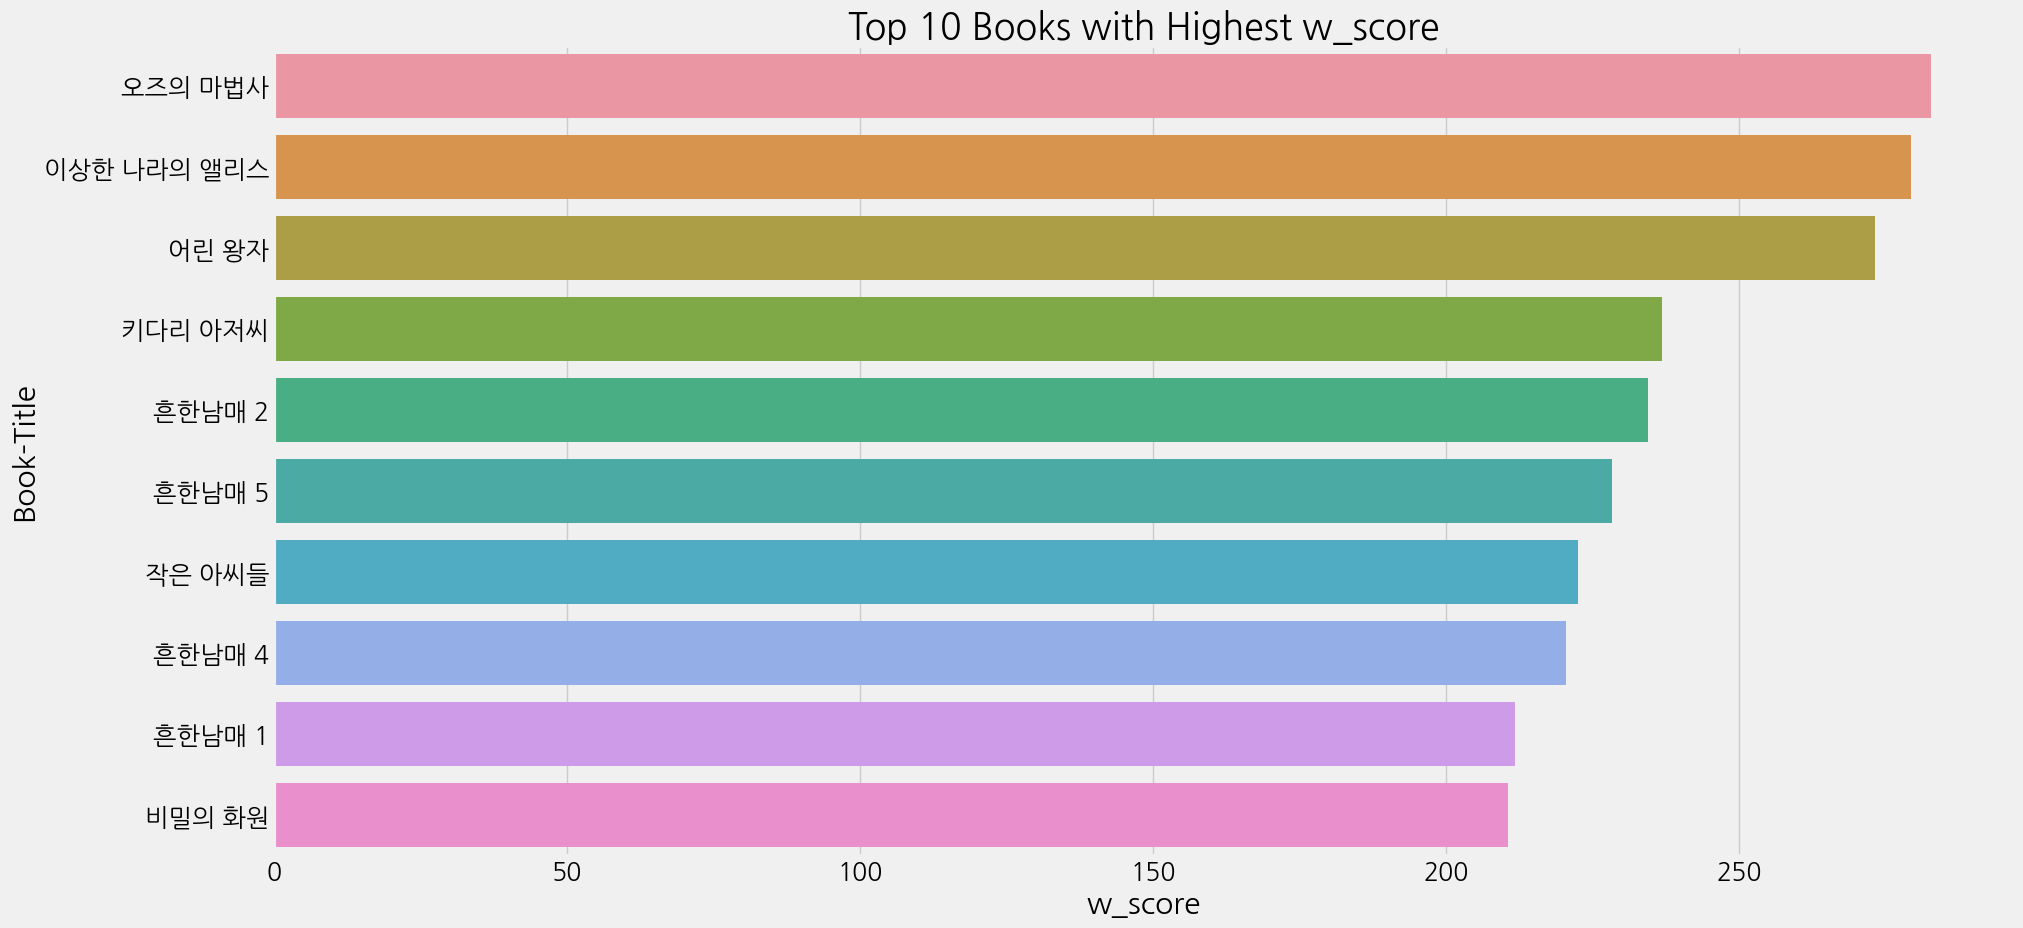

In [347]:
top_10_books = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='도서명', data=top_10_books)
plt.xlabel('w_score')
plt.ylabel('Book-Title')
plt.title('Top 10 Books with Highest w_score')
plt.show()

In [376]:
new_df=df_ISBN[df_ISBN['이용자ID'].map(df_ISBN['이용자ID'].value_counts()) > 300]  # Drop users who vote less than 200 times.
users_pivot=new_df.pivot_table(index=["이용자ID"],columns=["도서명"],values="대출건수")
users_pivot.fillna(0,inplace=True)

In [377]:
users_pivot.head()

도서명,"""Ahhh!"" said stork","""Not me,"" said the Monkey","""Pardon?""said the Giraffe","'초등 2학년' 평생 공부 습관을 '완성'하라 :내 아이를 공부에 길들일 결정적 시기, 22가지 법칙으로 잡아라!",(1.2학년이 꼭 읽어야 할 교과서) 속담,(100세까지 성장하는) 뇌 훈련 방법,(100일 동안 매일매일)소원 적는 아이들,(100％ 성공하는)채용과 면접의 기술 :성과기반의 채용과 구직을 위한 완벽 가이드,(10가지 누룩발효조미료로 만드는) 발효식탁,(10년 전) 하루 100엔 보관가게 : 오야마 준코 장편소설,...,힘들어도 꼭 해낼거야,힘세고 커다란 곰,힘세씨,힘센 브루저,힘센차사우루스,힘은 변신도 잘해요!,힘찬 나라 고구려,힙하게 힙합!,힙합 독수리,"힝, 나만 남으라고?"
이용자ID,,,,,,,,,,,,,,,,,,,,,
00000000GPLOAN,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000010144168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000011268961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0
13000011388668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000011469653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
def same_books(book):
    users_vote_film=users_pivot[book]
    similar_with=users_pivot.corrwith(users_vote_film)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [404]:
same_books('힝, 나만 남으라고?')

,correlation
도서명,
"힝, 나만 남으라고?",1.0
눈 다래끼 팔아요,1.0
20세기 최고의 탐험가 어니스트 섀클턴,1.0
Swords : (An)artist's devotion,1.0
높이-뛰어라-생쥐 : 미국 인디언 옛이야기,1.0
"STOP！. 1:, 동물들이 함께 사는 법",1.0
누나와 남동생,1.0
(The) Golly sisters ride again,1.0
누에가 자라고 자라서,1.0


In [381]:
df_ISBN.head()

,이용자ID,도서명,대출일,청구기호,별치기호,소속도서관,생일,성별,나이,연령,큰도서분류,도서분류,대출건수,저자,출판사,발행년도,ISBN,등록일자,도서권수
0,13000019083742,(피터 린치의) 이기는 투자,20220102,327.8 린974ㅇ,NaN,구암도서관,19660214,남,57,50,3,32,46,피터 린치 ; 존 로스차일드 지음 ; 권성희 옮김,흐름출판,2008,9788990872449,2008-08-20,9.0
1,13000017050092,"문방구 TV . 7 , 랭킹 대탐구",20220102,813.8 문589ㅁ v.7,아,유성도서관,19801120,여,43,40,8,81,28,문방구 TV,서울문화사,2020,9791164383436,2021-06-18,1.0
2,13000021042233,"나, 이사 갈 거야",20220102,808.3 동916ㄴ v.8 c.2,아,유성도서관,20130912,여,10,10,8,80,15,"린드그랜, 아스트리드",논장,2019,9788984143548,2021-03-31,7.0
3,13000011005389,Z 캠프 : 김영주 장편소설,20220102,813.7 김683ㅈ,NaN,한밭도서관,19791128,남,44,40,8,81,2,김영주,사계절출판사,2017,9788958284734,2018-12-24,1.0
4,13000015079511,"(제로니모의)환상모험 . 16 , 마르코 폴로의 위대한 모험",20220102,883 스233ㅎ v.16 c.3,아,노은도서관,20100429,남,13,10,8,88,10,"스틸턴, 제로니모",이퍼블릭,2013,9788964808757,2018-12-12,2.0


In [382]:
users_pivot

도서명,"""Ahhh!"" said stork","""Not me,"" said the Monkey","""Pardon?""said the Giraffe","'초등 2학년' 평생 공부 습관을 '완성'하라 :내 아이를 공부에 길들일 결정적 시기, 22가지 법칙으로 잡아라!",(1.2학년이 꼭 읽어야 할 교과서) 속담,(100세까지 성장하는) 뇌 훈련 방법,(100일 동안 매일매일)소원 적는 아이들,(100％ 성공하는)채용과 면접의 기술 :성과기반의 채용과 구직을 위한 완벽 가이드,(10가지 누룩발효조미료로 만드는) 발효식탁,(10년 전) 하루 100엔 보관가게 : 오야마 준코 장편소설,...,힘들어도 꼭 해낼거야,힘세고 커다란 곰,힘세씨,힘센 브루저,힘센차사우루스,힘은 변신도 잘해요!,힘찬 나라 고구려,힙하게 힙합!,힙합 독수리,"힝, 나만 남으라고?"
이용자ID,,,,,,,,,,,,,,,,,,,,,
00000000GPLOAN,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000010144168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000011268961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0
13000011388668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000011469653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13000022031490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000022046780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13000022046795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


book_df_matrix = csr_matrix(users_pivot.values)

def find_similar_books(book_name, num_neighbors=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    # Find the index of the input book
    book_index = users_pivot.columns.get_loc(book_name)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(book_df_matrix[book_index], n_neighbors=num_neighbors+1)
    # Exclude the first index (which is the input book itself)
    similar_indices = indices[0][1:]
    
    # Get the names of similar books based on indices
    list_similar_books = [users_pivot.columns[idx] for idx in similar_indices]
    similar_books=pd.DataFrame({"Similar books to":list_similar_books})
    return similar_books

# Example usage
input_book = "힘세씨" 
find_similar_books(input_book)

IndexError: row index (24844) out of range

In [399]:
def find_favorite_books(User_id, num_books=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    # Find the index of the input user
    user_index = users_pivot.index.get_loc(User_id)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(book_df_matrix[user_index], n_neighbors=num_books+1)
    # Exclude the first index (which is the input user's own preferences)
    favorite_indices = indices[0][1:]
    
    # Get the names of favorite books based on indices
    list_favorite_books = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_books=pd.DataFrame({"favorite books ":list_favorite_books})
    return favorite_books

# Example usage
User_id="13000022031490"
find_favorite_books(User_id)

,favorite books
0,"(10대들을 위한) 나의 문화유산답사기 . 2 , 백제 공주.부여 외"
1,(99％ 헛고생을 피하는)1％ 학습 코칭 : 초등부터 수능까지
2,(1주 체험) 미국 초등학교 수업 듣기
3,(A)cheese-colored camper
4,(2010) 황순원문학상 수상작품집 : 칼
5,(A)Presenr for Mum
6,"(500원 토끼) 퀴즈를 풀어라! , 보물섬편"
7,(2학년 6반) 고길희 선생님
8,(A) Day in london
9,(5학년 2반 오마리) 외교관 되다
